In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir('E:/4 SNU/PYTHON ML FILES')
os.getcwd()

'E:\\4 SNU\\PYTHON ML FILES'

In [3]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']

# Scaling the Data

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, random_state = 96, stratify = y)

# Import KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Checking Consistency using Crossing Validation

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [18]:
score.mean()*100, score.std()*100

(77.09859791949344, 4.856044270804294)

# Automating the above for different K-neighbors  

In [19]:
def Val_Score(n_neighbors):
    avg = []
    std = []
    for i in n_neighbors:
        score = cross_val_score(KNN(n_neighbors = i), X = train_x, y = train_y, cv = 10)
        avg.append(score.mean())
        std.append(score.std())
    return avg, std

In [20]:
n_neighbors = range(1,50)
mean, std = Val_Score(n_neighbors)

# Plotting Mean Valodation Score for each K Value

Text(0.5, 1.0, 'Mean Validation Score')

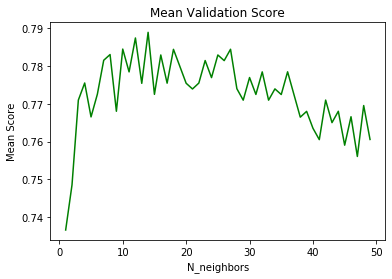

In [21]:
plt.plot(n_neighbors, mean, color = 'green', label = 'Mean')
plt.xlabel('N_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation Score')

Text(0.5, 1.0, 'Mean Validation Score')

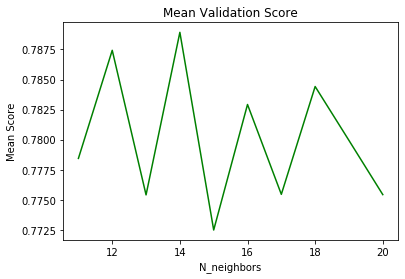

In [23]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'Mean')
plt.xlabel('N_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation Score')

# Plotting Standard Validation Score for each K Value

Text(0.5, 1.0, 'Standard Deviation of Validation Score')

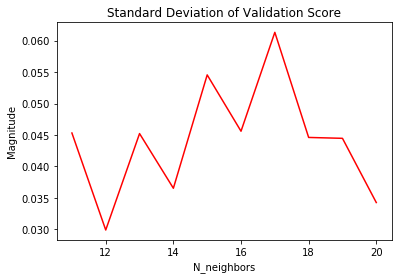

In [25]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard Deviation')
plt.xlabel('N_neighbors')
plt.ylabel('Magnitude')
plt.title('Standard Deviation of Validation Score')

# Trying the optimal model on the test set

In [26]:
clf = KNN(n_neighbors = 14)
clf.fit(train_x, train_y)
score1 = clf.score(train_x, train_y)
score = clf.score(test_x, test_y)
score, score1

(0.8161434977578476, 0.811377245508982)